In [1]:
import numpy as np
import pickle
import json
import copy
import pandas as pd
from tqdm import tqdm
import random

from perturbations import *
from helpers import *
# from pos_tag_distribution_helpers import *

# Read in data

Vocab

In [2]:
from Vocab import Vocab
vocab = Vocab('data/vocab.csv', 3)

Initialising vocab from file.


Segment data

In [3]:
from SegmentDataset import SegmentDataset

segment_test_set = SegmentDataset(
    data_dir='data/',
    segment_file='segments.json',
    vectors_file='vectors.json',
    split='test'
)

print("Testing the SegmentDataset class item getter...")
print("Dataset contains {} segment samples".format(len(segment_test_set)))
sample_id = 2
sample = segment_test_set[sample_id]
print("Segment {}:".format(sample_id))
print("Image set: {}".format(sample["image_set"]))
print("Target image index(es): {}".format(sample["targets"]))
# print("Target image Features: {}".format([segment_test_set.image_features[sample["image_set"][int(target)]] for target in sample["targets"]]))
print("Encoded segment: {}".format(sample["segment"]))
print("Decoded segment dialogue: {}".format(vocab.decode(sample["segment"])))
print("Segment length: ", sample["length"])
print("\nDone.")

Testing the SegmentDataset class item getter...
Dataset contains 6801 segment samples
Segment 2:
Image set: ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757']
Target image index(es): [6, 2, 3]
Encoded segment: [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41]
Decoded segment dialogue: ['-A-', 'one', 'with', 'roses', 'and', 'a', 'white', 'laptop', '?', '-B-', 'nope']
Segment length:  11

Done.


Chain data

In [4]:
from ChainDataset import ChainDataset

print("Testing the ChainDataset class initialization...")

chain_test_set = ChainDataset(
    data_dir='data/',
    segment_file='segments.json',
    chain_file='test_chains.json',
    vectors_file='vectors.json',
    split='test'
)

print("Dataset contains {} cains.".format(len(chain_test_set.chains)))

sample_id = 5
sample = chain_test_set.chains[sample_id]

print("Chain {}:".format(sample_id))
print("Source Game ID: {}".format(sample["game_id"]))
print("Target image index: {}".format(sample["target"]))
print("Chain length: {}".format(len(sample["segments"])))
print("Segment IDs: {}".format(sample["segments"]))
print("Segment lengths: ", sample["lengths"])
print("First segment encoding: {}".format(chain_test_set.segments[sample["segments"][0]]["segment"]))
print("First segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][0]]["segment"])))
print("Second segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][1]]["segment"])))
# print("third segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][2]]["segment"])))

print("Reference chain and segments' associated image sets:")
for segment in sample["segments"]:
    print(vocab.decode(chain_test_set.segments[segment]["segment"]))
    print(chain_test_set.segments[segment]["image_set"])
print("\nDone.")

print("Testing the ChainDataset class item getter...")


Testing the ChainDataset class initialization...
Dataset contains 2811 cains.
Chain 5:
Source Game ID: 3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO
Target image index: 522129
Chain length: 4
Segment IDs: [3, 10, 12, 15]
Segment lengths:  [23, 23, 21, 19]
First segment encoding: [5, 38, 191, 23, 127, 11, 6, 120, 23, 127, 15, 9, 314, 10, 4, 13, 5, 80, 14, 128, 68, 22, 10]
First segment decoded dialogue: ['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']
Second segment decoded dialogue: ['-A-', 'do', 'you', 'have', 'the', 'one', 'with', 'two', 'plates', 'and', 'the', 'salsa', 'in', 'the', 'middle', '?', '-B-', 'i', 'do', "n't", 'have', 'that', 'one']
Reference chain and segments' associated image sets:
['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']


Game ids

In [5]:
with open('data/test_ids.json') as json_file:
    game_ids = json.load(json_file)
game_ids

['3Z7EFSHGNACKCBAG5WMPCIYUZO6XCI39JEC7537VZS8M5L5HL7OX19JDYVCD',
 '3RWE2M8QWI8V6P1WRA6WJF5VNDKN0Z33JKGHPFYDSS9383GFTUHCC8QGLNMA',
 '3A1PQ49WVIF33I03KVFJS0R96RAH1C3018Q3ZVOJOCM0R6CJK6H5MIXUERA7',
 '3SB5N7Y3O42PWXKA46T1TVWYJIZ0G031EUONYN2W1THB2OVMUYJXVQ400OV0',
 '39PAAFCODNY9U37WR3GXD71D47STV13DY46V3X3QGQB7HRKGGM6T10BG855J',
 '3XUHV3NRVLW2R01MLIHVVQ4QGP05H13YDTZAI2WYE9R6C85OV0YBI5Z4941W',
 '3CTOC39K38OD5AAVXBZD5NY1JJ97JO3VHP9MDGROI3CPJV52G36BYNROHCFJ',
 '3KKG4CDWKJWRGBF391ATDH0O33G9493P529IW9KZJWFTD1IF929UOASN6LF6',
 '3NL0RFNU0GLBX7YUDY1I3QE4AIDK413OSWBBLG1FVUH3GU5SH0WOGCJ4LDXW',
 '31T4R4OBOTEQXW4PNJIRIJL6VO47CU3OE22WJIGJMWP8Q459CXCGO77E7UQT',
 '3JMSRU9HQJS75KPZ18R2EL1C6WIEVC39DD6S19JQ9OE4U925G5ZRE8U7OEZC',
 '3KRVW3HTZOJPPG08OBAGG6MEE4HMSO3OLQQLKKNTNYEPP5KJDJBXQI9JEJEH',
 '35GMH2SV3FFCF0G20W5OJT748FDOEY3RKNTXVS3NW5LUP817OT9CB869G4AA',
 '3A4TN5196LGNQLA10S439WA0AJHCH3304SM51WA42T6PWBXMK72QBK190BSI',
 '3KKG4CDWKJWRGBF391ATDH0O3DB94O3ERET4BTVN7CUD46UTX9KYPK0Z39KG',
 '3ZSANO2JCG5JJ68R2O63LG2

# Models

Load model

In [6]:
from get_predictions import get_predictions
from helpers import *

In [ ]:
# Get the datasets for experiment split
dataset_pred_no_hist, dataset_pred_hist_cp = get_pred_datasets(split='test')

loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test
history dataset with test_segments.json vectors.json test_chains.json test
processing test

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicitons took 86.005051612854 seconds
lo

In [ ]:

# # pickle.dump( dataset_pred_no_hist, open( "dataset_pred_no_hist.p", "wb" ) )
# # pickle.dump( dataset_pred_hist_cp, open( "dataset_pred_hist_cp.p", "wb" ) )
# dataset_pred_no_hist = pickle.load(open( "dataset_pred_no_hist.p", "rb" ) )
# dataset_pred_hist_cp = pickle.load(open( "dataset_pred_hist_cp.p", "rb" ) )

In [ ]:
# First index
ind = 24
print('Endocing of this segment is', dataset_pred_no_hist[ind]['segment'])
print('Decoded segment is', vocab.decode(dataset_pred_no_hist[ind]['segment']))
print('Length of the segment is', dataset_pred_no_hist[ind]['length'])
print('Images in the round of this segment is', dataset_pred_no_hist[ind]['image_set'])
print('Target of this segment is', dataset_pred_no_hist[ind]['targets'])
print('Rank (e.g. first time or third time this image was referenced in this game)', dataset_pred_no_hist[ind]['ranks'])
print('Predictions of the model on the segment is', dataset_pred_no_hist[ind]['preds'])
print('Loss of the predictions', dataset_pred_no_hist[ind]['loss'])

print(len(dataset_pred_no_hist))

## Sort segments into conditions

The following things have been taken into account when creating the dataframes:
- Only the predictions where there was only one target image given a segment (and thus not multiple target images given a segment)
- Only the predictions where the model predicts one image (and thus not multiple images given a segment)

correct_prediction = 1 when the model predicts correctly, 0 when the model predicts wrong

In [ ]:
dataframe = get_pred_dataframe(dataset_pred_no_hist, dataset_pred_hist_cp)
    

Sort the segments in their conditions (whether the history/no history dataset predicted them correctly)

hT_nhF - history True, no-history False (so it was correctly predicted with history, incorrectly without)

Conditions_inds is a dictionary of lists, {'condition': [segment indices for this condition]}

In [ ]:
conditions_inds = get_conditions_inds(dataframe)

print("Number of segments in conditions")
counter = 0
for key in conditions_inds:
    print(key, len(conditions_inds[key]))
    counter +=len(conditions_inds[key])
counter

In [ ]:
print("The number of segments per condition that have a history:")
# For each condition
for condition in conditions_inds:
    counter = 0
#     for seg_id in range(len(dataset_pred_hist_cp)):
    # Iterate over the indices in this condition
    for seg_id in conditions_inds[condition]:
        # For each chain that this segment belongs to
        for chain_i in range(len(dataset_pred_hist_cp[seg_id]['chains'])):
            # Add counter if the segment is not the first round
            if dataset_pred_hist_cp[seg_id]['rounds'][chain_i] > 0:
                counter += 1
                break
    print(condition, counter)

In [ ]:
results_hist_orig, results_nohist_orig, accs_hist_orig, accs_nohist_orig = get_accuracies(conditions_inds, dataframe)
print("history accuracy")
print(accs_hist_orig)
print("no history accuracy")
print(accs_nohist_orig)


## Combine segments with first in the chain for analyses
Create a dict with the first segment and current segment of a condition


In [ ]:
condition_seg_hist = get_condition_seg_hist(conditions_inds, dataset_pred_hist_cp)

In [ ]:
seg_id = 11
condition_seg_hist['hT_nhT'][13]

## leaving out pos tags

In [ ]:
def run_pos_tag_exp(tag, perc_remove):
    

    
    percentage_remove = perc_remove / 100
    
    from ChainDataset import ChainDataset

    chain_test_set = ChainDataset(
        data_dir='data/',
        segment_file='segments.json',
        chain_file='test_chains.json',
        vectors_file='vectors.json',
        split='test'
    )
    from collections import Counter
    import nltk
    import pickle
    from nltk import word_tokenize
    from nltk.tag import pos_tag
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('tagsets')
    nltk.download('universal_tagset')

    from Vocab import Vocab
    vocab = Vocab('data/vocab.csv', 3)
    with open('oov_dictionary.pickle', 'rb') as f:
        oov_dict = pickle.load(f)
    
    history_dict = create_history_dict(chain_test_set.chains)

    # Remove tags from nouns
    segment_test_set_cp, chain_test_set_cp = import_dialogue_data()
    
    
    print("EERST", segment_test_set_cp[8])
    segment_test_set = remove_tag(tag, segment_test_set_cp, percentage_remove)
    print("DAARNA", segment_test_set[8])
    chain_data = update_history_dataset(segment_test_set, history_dict, chain_test_set_cp)
    
    print("IN CHAIN", chain_data[0])
    dump_json_files(chain_data, segment_test_set, tag, perc_remove)
    
    return None



## Perturbations

If we make a new perturbation:
    
    * create a new segment and chain file, even if one of them is the same as the test file. Leave vocab file just as it is.
    * Make sure the file format is split+_chains.json and split+segments.json, where split is e.g. 'test_shuffle'. Split can be used to indicate the experiment that is run
    * Also let these files be put into the '/data' folder
    * When shuffeling files based on chain_test_set or segments_test set, make a deep copy first!!
    * If you change the segments in the chains json file, make sure you also update the lengths
    
    * add the experiment and the correspnding segment and chain files in the experiment_names dictionary
  

##### extra info
The training model takes these files as input. 

Change chains if we want to switch up the segments (i.e. from other games or change the order)

Change segments if we want to change things within the utterances

In [ ]:
# For later analyses
experiment_names = {
                    "standard":{'segments_file':'data/test_chains.json',
                                'chains_file':'data/test_segments.json',
                                'split':'test'},
                   "shuffle":{'segments_file':'data/test_shuffle_chains.json',
                                'chains_file':'data/test_shuffle_segments.json',
                                'split':'test_shuffle'},
                    
                    "pos_tag_noun":{'segments_file':'data/test_noun_segments.json',
                                'chains_file':'data/test_noun_chains.json',
                                'split':'test_noun'},
                    "pos_tag_verb":{'segments_file':'data/test_verb_segments.json',
                                'chains_file':'data/test_verb_chains.json',
                                'split':'test_verb'},
                    "pos_tag_adj":{'segments_file':'data/test_adj_segments.json',
                                'chains_file':'data/test_adj_chains.json',
                                'split':'test_adj'},
                    "pos_tag_adv":{'segments_file':'data/test_adv_segments.json',
                                'chains_file':'data/test_adv_chains.json',
                                'split':'test_adv'},
                    
                    "pos_tag_noun":{'segments_file':'data/test_NOUN_100_segments.json',
                                'chains_file':'data/test_NOUN_100_chains.json',
                                'split':'test_noun'},
                    "pos_tag_verb":{'segments_file':'data/test_VERB_100_segments.json',
                            'chains_file':'data/test_VERB_100_chains.json',
                            'split':'test_verb'},
                    "pos_tag_adj":{'segments_file':'data/test_ADJ_100_segments.json',
                            'chains_file':'data/test_ADJ_100_chains.json',
                            'split':'test_adj'},
                    "pos_tag_adv":{'segments_file':'data/test_ADV_100_segments.json',
                            'chains_file':'data/test_ADV_100_chains.json',
                            'split':'test_adv'},
    
                    "pos_tag_noun":{'segments_file':'data/test_NOUN_50_segments.json',
                            'chains_file':'data/test_NOUN_50_chains.json',
                            'split':'test_noun'},
                    "pos_tag_verb":{'segments_file':'data/test_VERB_50_segments.json',
                            'chains_file':'data/test_VERB_50_chains.json',
                            'split':'test_verb'},
                    "pos_tag_adj":{'segments_file':'data/test_ADJ_50_segments.json',
                            'chains_file':'data/test_ADJ_50_chains.json',
                            'split':'test_adj'},
                    "pos_tag_adv":{'segments_file':'data/test_ADV_50_segments.json',
                            'chains_file':'data/test_ADV_50_chains.json',
                            'split':'test_adv'},

                    
                   "games_0":{'segments_file':'data/test_games_0_segments.json',
                                'chains_file':'data/test_games_0_chains.json',
                                'split':'test_games_0'},
                   "games_1":{'segments_file':'data/test_games_1_segments.json',
                                'chains_file':'data/test_games_1_chains.json',
                                'split':'test_games_1'},
                   "games_2":{'segments_file':'data/test_games_2_segments.json',
                                'chains_file':'data/test_games_2_chains.json',
                                'split':'test_games_2'},
                   "games_3":{'segments_file':'data/test_games_3_segments.json',
                                'chains_file':'data/test_games_3_chains.json',
                                'split':'test_games_3'},
                   "games_4":{'segments_file':'data/test_games_4_segments.json',
                                'chains_file':'data/test_games_4_chains.json',
                                'split':'test_games_4'},
                    
                   "imgs_0":{'segments_file':'data/test_imgs_0_segments.json',
                                'chains_file':'data/test_imgs_0_chains.json',
                                'split':'test_imgs_0'},   
                   "imgs_1":{'segments_file':'data/test_imgs_1_segments.json',
                                'chains_file':'data/test_imgs_1_chains.json',
                                'split':'test_imgs_1'},   
                   "imgs_2":{'segments_file':'data/test_imgs_2_segments.json',
                                'chains_file':'data/test_imgs_2_chains.json',
                                'split':'test_imgs_2'},   
                   "imgs_3":{'segments_file':'data/test_imgs_3_segments.json',
                                'chains_file':'data/test_imgs_3_chains.json',
                                'split':'test_imgs_3'},   
                   "imgs_4":{'segments_file':'data/test_imgs_4_segments.json',
                                'chains_file':'data/test_imgs_4_chains.json',
                                'split':'test_imgs_4'},   
                   }

for experiment in experiment_names:
    experiment_names[experiment]['accs_hist'] = []
    experiment_names[experiment]['accs_nohist'] = []
    experiment_names[experiment]['lengths'] = []
    experiment_names[experiment]['dataframe'] = []
    experiment_names[experiment]['changed_seg_ids'] = []

In [ ]:
experiment_names

### Shuffle experiment
Change order of the segments in a chain

In [ ]:
import copy
from perturbations import chain_shuffle

# Get a deepcopy of the chain list
chain_test_shuf_ch = copy.deepcopy(chain_test_set.chains)   

# Shuffle segment order
# Make sure output file ends with chains.json. So now 'test_shuf' is the split argument in following functions
data_chain_shuf, data_seg_shuf = chain_shuffle(chain_test_shuf_ch, chain_file='data/test_shuffle_chains.json', segment_file='data/test_shuffle_segments.json')

In [ ]:
pert_sanity_check(test_chains_exp='data/test_shuffle_chains.json', test_segm_exp='data/test_shuffle_segments.json')

## Game exchange experiment
For a certain round round_id, change the segment in that round for a segment on the same image from the same round but a random game

In [ ]:
def pert_exchange_games(chain_copy, segment_test_set, round_id, chain_file_start='data/test_games_', segment_file_start='data/test_games_', output=True):
    """ 
    Chain_copy is a deepcopy of chain_test_set.chains
    Changes the segements in round round_id for another segment on the same image another game (including its target). 
    Returns the new chain, segment and list of the segment ids that were changed
    """
    
    chain_test_game_n, segment_test_set, changed_seg_ids = exchange_games(chain_copy, segment_test_set, round_id)
    segment_list = [segment_test_set[i] for i in range(len(segment_test_set))]

    # Write new chains and segment file
    if output:
        with open(chain_file_start+str(round_id)+'_chains.json', 'w') as json_file:
            json.dump(chain_test_game_n, json_file)
        with open(segment_file_start+str(round_id)+'_segments.json', 'w') as json_file:
            json.dump(segment_list, json_file)
    return chain_test_game_n, segment_list, changed_seg_ids


def get_seg2chains(chains, segment_test_set):
    """
    chains is chain_test_set.chains
    returns a dict that gives a list of chainids for each segment id
    """
    seg2chains = {seg_id:[] for seg_id in range(len(segment_test_set))}
    for chain_id in range(len(chains)):
        for seg_id in chains[chain_id]['segments']:
            seg2chains[seg_id].append(chain_id)
    return seg2chains


def exchange_games(chains, segment_test_set, round_id):
    """
    chains is chain_test_set.chains
    round_id is the round that we want to change

    Changes the segements in round round_id for another segments text on the same image another game
    
    Returns the new chain test set and the segment indices of the new segments in the chains.
    """
    # Get a deepcopy of the chain list  
    chain_test_game_n = copy.deepcopy(chains) 
    segment_test_set_cp =copy.deepcopy(segment_test_set)   

    img_dict = get_img_dict(chains)
    seg2chains = get_seg2chains(chains, segment_test_set)
    changed_seg_ids = []
    
    # Shuffle the chain indices so that each segment still occurs once
    for img_id in img_dict:
        if round_id in img_dict[img_id]:
            random.shuffle(img_dict[img_id][round_id]['chain_ids_shuf'])

    # Iterate over the indices in the chain set
    for chain_id in range(len(chain_test_game_n)):
        img_id = chain_test_game_n[chain_id]['target']

        # Check if there are at least round_id rounds in this chain
        if len(chain_test_game_n[chain_id]['segments']) <= round_id:
            continue
        # Check if there are other games to change segment texts with
        if len(set(img_dict[img_id][round_id]['game_ids'])) == 1:
            continue
        # Check if the segment occurs in only one chain, otherwise the perturbations are unclear
        current_segid = chain_test_game_n[chain_id]['segments'][round_id]
        if len(seg2chains[current_segid]) > 1:
            continue
        
        # Get index of the new segment, given the shuffled chain ids
        new_seg_ind = img_dict[img_id][round_id]['chain_ids_shuf'].index(chain_id)
        new_seg_id = img_dict[img_id][round_id]['segments'][new_seg_ind]

        # Change segment text in round_id to the new_seg_id
        # Change the text of this segment to the new seg id text in the segmentstestset
        segment_test_set_cp[current_segid]['segment'] = segment_test_set[new_seg_id]['segment']
        segment_test_set_cp[current_segid]['length'] = segment_test_set[new_seg_id]['length']
        # Change the length in the chain it occurs in 
        chain_test_game_n[chain_id]['lengths'][round_id] = len(segment_test_set_cp[current_segid]['segment'])

        # Save new segment id for analysis
        changed_seg_ids.append(current_segid)
    return chain_test_game_n, segment_test_set_cp, changed_seg_ids

def get_img_dict(chains):
    """
    chains is chain_test_set.chains
    Return a dictionary of
    {img_id:{'round_id':'segments':[segids],
                        'lengths':[seglengths],
                        'game_ids':[gameids],
                        'chain_ids':[chainids],
                        'chain_ids_shuf':[chainids]}}
    where img_id is the image id of the target of the segments
    round_id is the round/rank, i.e. the i'th time the image is being talked about
    segid is the segment id
    seglength is the length of the segment with the corresponding index
    gameid is the gameid to which the segment with the corresponding index belongs
    chain_ids is the chain_ids to which the segment with the corresponding index belongs
    chain_ids_shuf can be shuffled so that the index of the chainid can be used to shuffle the segments
    """
    img_dict = {}
    # Get segments, lengths and gameids
    for chain_id in range(len(chains)):
        image_ind = chains[chain_id]['target']
        game_id = chains[chain_id]['game_id']
        # Add target image index to the img_dict
        if image_ind not in img_dict:
            img_dict[image_ind] = {}

        # Iterate over the rounds/segments
        for round_ind in range(len(chains[chain_id]['segments'])):

            # Add round to the dict for this target image
            if round_ind not in img_dict[image_ind]:
                img_dict[image_ind][round_ind] = {'segments':[],
                                                  'lengths':[],
                                                 'game_ids':[],
                                                 'chain_ids':[],
                                                 'chain_ids_shuf':[]}

            # Add segment with the length and gameid info to this round dict
            img_dict[image_ind][round_ind]['segments'].append(chains[chain_id]['segments'][round_ind])
            img_dict[image_ind][round_ind]['lengths'].append(chains[chain_id]['lengths'][round_ind])
            img_dict[image_ind][round_ind]['game_ids'].append(game_id)
            img_dict[image_ind][round_ind]['chain_ids'].append(chain_id)
            img_dict[image_ind][round_ind]['chain_ids_shuf'].append(chain_id)

    return img_dict


In [ ]:
chain_copy = copy.deepcopy(chain_test_set.chains)
chain_test_img_n, segments, changed_seg_ids = pert_exchange_games(chain_copy, segment_test_set, 0, chain_file_start='data/test_games_', segment_file_start='data/test_games_', output=True)


In [ ]:
pert_sanity_check(test_chains_exp='data/test_games_0_chains.json', test_segm_exp='data/test_games_0_segments.json')

## Image exchange experiment
For a round_id, change the segment for another segment on another target image but from the same game

In [ ]:
def pert_exchange_imgs(chain_copy, segment_test_set, round_id, chain_file_start='data/test_imgs_', segment_file_start='data/test_imgs_', output=True):
    """ 
    Chain_copy is a deepcopy of chain_test_set.chains
    """
    
    chain_test_game_n, segment_test_set, changed_seg_ids = exchange_images(chain_copy, segment_test_set, round_id)
    segment_list = [segment_test_set[i] for i in range(len(segment_test_set))]

    # Write new chains file
    if output:
        with open(chain_file_start+str(round_id)+'_chains.json', 'w') as json_file:
            json.dump(chain_test_game_n, json_file)
        # Keep segment file the same
        with open(segment_file_start+str(round_id)+'_segments.json', 'w') as json_file:
            json.dump(segment_list, json_file)
    return chain_test_game_n, segment_list, changed_seg_ids

def get_seg2chains(chains, segment_test_set):
    """
    chains is chain_test_set.chains
    returns a dict that gives a list of chainids for each segment id
    """
    seg2chains = {seg_id:[] for seg_id in range(len(segment_test_set))}
    for chain_id in range(len(chains)):
        for seg_id in chains[chain_id]['segments']:
            seg2chains[seg_id].append(chain_id)
    return seg2chains

def exchange_images(chains, segment_test_set, round_id):
    """
    chains is chain_test_set.chains
    round_id is the round that we want to change

    Changes the segements in round round_id for another segment of the same game but another image (including its target). 
    Returns the new chain test set and the segment indices of the new segments in the chains.
    """
    # Get a deepcopy of the chain list
    chain_test_game_n = copy.deepcopy(chains)
    segment_test_set_cp =copy.deepcopy(segment_test_set)
    
    game_dict = get_game_dict(chains)
    seg2chains = get_seg2chains(chains, segment_test_set)
    changed_seg_ids = []
    
    # Shuffle the target indices
    for game_id in game_dict:
        if round_id in game_dict[game_id]:
            random.shuffle(game_dict[game_id][round_id]['chain_ids_shuf'])

    # Iterate over the indices in the chain set
    for chain_id in range(len(chain_test_game_n)):
        game_id = chain_test_game_n[chain_id]['game_id']

        # Check if there are at least round_id rounds in this chain
        if len(chain_test_game_n[chain_id]['segments']) <= round_id:
            continue
        # Check if there are other images to change segment text with
        if len(set(game_dict[game_id][round_id]['targets'])) == 1:
            continue
        # Check if the segment occurs in only one chain, otherwise the perturbations are unclear
        current_segid = chain_test_game_n[chain_id]['segments'][round_id]
        if len(seg2chains[current_segid]) > 1:
            continue

        # Get index of the new segment, given the shuffled chain ids
        new_seg_ind = game_dict[game_id][round_id]['chain_ids_shuf'].index(chain_id)
        new_seg_id = game_dict[game_id][round_id]['segments'][new_seg_ind]


        # Change segment text in round_id to the new_seg_id
        # Change the text of this segment to the new seg id text in the segmentstestset
        segment_test_set_cp[current_segid]['segment'] = segment_test_set[new_seg_id]['segment']
        segment_test_set_cp[current_segid]['length'] = segment_test_set[new_seg_id]['length']
        # Change the length in the chain it occurs in 
        chain_test_game_n[chain_id]['lengths'][round_id] = len(segment_test_set_cp[current_segid]['segment'])

        # Save new segment id for analysis
        changed_seg_ids.append(current_segid)
    return chain_test_game_n, segment_test_set_cp, changed_seg_ids


def get_game_dict(chains):
    """
    chains is chain_test_set.chains
    Return a dictionary of
    {game_id:{'round_id':'segments':[segids],
                        'lengths':[seglengths],
                        'game_ids':[gameids]}}
    where game_id is the game_id of the chain
    round_id is the round/rank, i.e. the i'th time the image is being talked about
    segid is the segment id
    seglength is the length of the segment with the corresponding index
    gameid is the gameid to which the segment with the corresponding index belongs

    Used for exchange_images()
    """
    game_dict = {}
    # Get segments, lengths and gameids
    for chain_id in range(len(chains)):
        image_ind = chains[chain_id]['target']
        game_id = chains[chain_id]['game_id']
        # Add gameid to the game_dict    
        if game_id not in game_dict:
            game_dict[game_id] = {}

        # Iterate over the rounds/segments
        for round_ind in range(len(chains[chain_id]['segments'])):

            # Add round to the dict for this target image
            if round_ind not in game_dict[game_id]:
                game_dict[game_id][round_ind] = {'segments':[],
                                                  'lengths':[],
                                                 'game_ids':[],
                                                 'targets':[],
                                                 'chain_ids':[],
                                                 'chain_ids_shuf':[]}

            # Add segment with the length and gameid info to this round dict
            game_dict[game_id][round_ind]['segments'].append(chains[chain_id]['segments'][round_ind])
            game_dict[game_id][round_ind]['lengths'].append(chains[chain_id]['lengths'][round_ind])
            game_dict[game_id][round_ind]['game_ids'].append(game_id)
            game_dict[game_id][round_ind]['targets'].append(image_ind)
            game_dict[game_id][round_ind]['chain_ids'].append(chain_id)
            game_dict[game_id][round_ind]['chain_ids_shuf'].append(chain_id)

    return game_dict





In [ ]:
for round_id in [0, 1, 2, 3, 4]:
    chain_copy = copy.deepcopy(chain_test_set.chains)   
    chain_test_game_n, segments, changed_seg_ids = pert_exchange_imgs(chain_copy, segment_test_set, round_id, chain_file_start='data/test_imgs_', segment_file_start='data/test_imgs_', output=True)


In [ ]:
pert_sanity_check(test_chains_exp='data/test_imgs_0_chains.json', test_segm_exp='data/test_imgs_0_segments.json')

## Run perturbation predictions
Get the accuracies per condition for an experiment.
The experiments will be saved in the experiment_names dictionary.

In [ ]:
def experiment_accs(conditions_inds, split='test'):
    # Get dataframes
    dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp = get_pred_datasets(split=split)
    # Get predictions of the segments
    dataframe_exp = get_pred_dataframe(dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp)
    # Get the accuracy dict
    results_hist, results_nohist, accs_hist, accs_nohist = get_accuracies(conditions_inds, dataframe_exp)
    
    return accs_hist, accs_nohist, dataframe_exp, dataset_pred_hist_cp_exp, dataset_pred_no_hist_exp
    
def run_experiment(experiment, conditions_inds):

    split = experiment_names[experiment]['split']
    accs_hist, accs_nohist, dataframe_exp, dataset_pred_hist_cp_exp, dataset_pred_no_hist_exp = experiment_accs(conditions_inds, split=split)

    print(f"Experiment{experiment} accuracies:")
    print("history:")
    print(accs_hist)
    print("No history")
    print(accs_nohist)

    return accs_hist, accs_nohist, dataframe_exp

def new_changed_seg(changed_seg_ids):
    new_changed_seg_ids = []
    for item in changed_seg_ids:
        if changed_seg_ids.count(item)==1:
            new_changed_seg_ids.append(item)
    return new_changed_seg_ids

def run_exp_games_imgs(conditions_inds, segment_test_set, round_id, chains, split, exp='games'):
    """
    chains = chain_test_set.chains
    """
    # Create new segment and chain file
    chain_copy = copy.deepcopy(chains)
    if exp == 'games':
        chain_test_game_n, segments, changed_seg_ids = pert_exchange_games(chain_copy, segment_test_set, round_id, chain_file_start='data/test_games_', segment_file_start='data/test_games_', output=True)
    elif exp == 'imgs':
        chain_test_img_n, segments, changed_seg_ids = pert_exchange_imgs(chain_copy, segment_test_set, round_id, chain_file_start='data/test_imgs_', segment_file_start='data/test_imgs_', output=True)

    # Remove segments that have their history changed multiple times
    changed_seg_ids = new_changed_seg(changed_seg_ids)
    # TODO: Create new conditions_inds
        
    # Get dataframes
    dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp = get_pred_datasets(split=split)

    # Get predictions of the segments
    dataframe_exp = get_pred_dataframe(dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp)
    
    # Get accuracies
    results_hist, results_nohist, accs_hist, accs_nohist = get_accuracies_seg(conditions_inds, dataframe_exp, changed_seg_ids)
    # Get the number of segments that were changed per condition
    lengths = check_lengths(changed_seg_ids, conditions_inds)
    
    return accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe_exp, changed_seg_ids


In [ ]:

def experiment_results(experiment_names, chains, segment_test_set, conditions_inds, experiment, remove_prob=0, tag=""):
    """
    Run an experiment [standard, shuffle, pos_tag_noun..., games_0..., imgs_0...]
    round_id is the round for the games and imgs experiments
    prop is the proportion of the pos tags that are to be removed
    n is number of times 
    """
    split = experiment_names[experiment]['split']
    chains = copy.deepcopy(chains)
    
    if experiment == "standard":
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []
    
    elif experiment == "shuffle":
        # Shuffle segment order
        data_chain_shuf, data_seg_shuf = chain_shuffle(chain_test_shuf_ch, chain_file='data/test_shuffle_chains.json', segment_file='data/test_shuffle_segments.json')

        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    # POS experiments
    # TODO: ADD CREATION OF FILES HERE
    # TODO: ADD PERCENTAGE HERE
    elif experiment == "pos_tag_noun":
        
        run_pos_tag_exp(tag, remove_prob)
        
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    elif experiment == "pos_tag_verb":
        run_pos_tag_exp(tag, remove_prob)
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    elif experiment == "pos_tag_adj":
        run_pos_tag_exp(tag, remove_prob)
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    elif experiment == "pos_tag_adv":
        run_pos_tag_exp(tag, remove_prob)
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    # Game exchange
    elif experiment.startswith('games'):
        round_id = int(experiment[-1])
        accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe, changed_seg_ids = run_exp_games_imgs(conditions_inds, segment_test_set, round_id, chains, split, exp='games')
    
    # Imgs exchange
    elif experiment.startswith('imgs'):
        round_id = int(experiment[-1])
        accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe, changed_seg_ids = run_exp_games_imgs(conditions_inds, segment_test_set, round_id, chains, split, exp='imgs')
    
    
    # Save the accuracies to the experiment_names dict
    experiment_names[experiment]['accs_hist'].append(accs_hist)
    experiment_names[experiment]['accs_nohist'].append(accs_nohist)
    experiment_names[experiment]['lengths'].append(lengths)
    experiment_names[experiment]['dataframe'].append(dataframe)
    experiment_names[experiment]['changed_seg_ids'].append(changed_seg_ids)

    return experiment_names, accs_hist, accs_nohist, lengths

### Test if it works for games_1, imgs_1, and shuffle

In [ ]:
# for i in range(2):
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains, 
#                                                                            segment_test_set=segment_test_set,
#                                                                            conditions_inds=conditions_inds,
#                                                                            experiment='games_1')
#     print(experiment_names)

In [ ]:
# experiment_names

In [ ]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names,
#                                                                        chains=chain_test_set.chains,
#                                                                        segment_test_set=segment_test_set,
#                                                                        conditions_inds=conditions_inds,
#                                                                        experiment='imgs_1')
# experiment_names

In [ ]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names,
#                                                                        chains=chain_test_set.chains,
#                                                                        segment_test_set=segment_test_set,
#                                                                        conditions_inds=conditions_inds,
#                                                                        experiment='shuffle', prob=1)
# experiment_names

### Run experiments multiple times

### POS tag perturbations

Remove all instances of a pos tag

In [ ]:
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_noun', remove_prob = 100, tag = "NOUN")
# pickle.dump( experiment_names, open( "experiment_remove_noun_100.p", "wb" ))
# print("DONE NOUN")
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_verb', remove_prob = 100, tag = "VERB")
# pickle.dump( experiment_names, open( "experiment_remove_verb_100.p", "wb" ))
# print("DONE VERB")
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_adj', remove_prob = 100, tag = "ADJ")
# pickle.dump( experiment_names, open( "experiment_remove_adj_100.p", "wb" ))
# print("DONE ADJ")
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_adv', remove_prob = 100, tag = "ADV")
# pickle.dump( experiment_names, open( "experiment_remove_adv_100.p", "wb" ))
# print("DONE ADV")

Remove half of the instances

In [ ]:
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_noun', remove_prob = 50, tag = "NOUN")
# pickle.dump( experiment_names, open( "experiment_remove_noun_50.p", "wb" ))
# print("DONE NOUN")
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_verb', remove_prob = 50, tag = "VERB")
# pickle.dump( experiment_names, open( "experiment_remove_verb_50.p", "wb" ))
# print("DONE VERB")
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_adj', remove_prob = 50, tag = "ADJ")
# pickle.dump( experiment_names, open( "experiment_remove_adj_50.p", "wb" ))
# print("DONE ADJ")
# n_exp = 1
# for i in range(n_exp):
#     chain_copy = copy.deepcopy(chain_test_set.chains)
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
#                                                                            experiment='pos_tag_adv', remove_prob = 50, tag = "ADV")
# pickle.dump( experiment_names, open( "experiment_remove_adv_50.p", "wb" ))
# print("DONE ADV")

In [ ]:
# pickle.dump( experiment_names, open( "experiment_names_pos_2706.p", "wb" ) )


### Game perturbations

In [ ]:
n_exp = 3
for i in range(n_exp):
    for round_id in range(5):
        chain_copy = copy.deepcopy(chain_test_set.chains)
        experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, 
                                                                           segment_test_set=segment_test_set,
                                                                           conditions_inds=conditions_inds,
                                                                            experiment='games_'+str(round_id))
experiment_names

In [ ]:
pickle.dump( experiment_names, open( "experiment_names_game_2706_bloep.p", "wb" ) )


### Image perturbations

In [ ]:
n_exp = 3
for i in range(n_exp):
    for round_id in range(5):
        chain_copy = copy.deepcopy(chain_test_set.chains)
        experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy,
                                                                               segment_test_set=segment_test_set,
                                                                               conditions_inds=conditions_inds,
                                                                               experiment='imgs_'+str(round_id))
experiment_names

In [ ]:
pickle.dump( experiment_names, open( "experiment_names_game_img_2506_bloep.p", "wb" ) )


### Shuffle chain perturbations

In [ ]:
for i in range(3):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy,
                                                                           segment_test_set=segment_test_set,
                                                                           conditions_inds=conditions_inds,
                                                                           experiment='shuffle')
experiment_names

In [ ]:
pickle.dump( experiment_names, open( "experiment_names_game_img_shuf_2706_bloep.p", "wb" ) )


## Analysis of the accuracies

In [38]:
import matplotlib.pyplot as plt
def print_accs(experiment, print_res=True):
    accs_hist = {condition:[] for condition in experiment_names[experiment]['accs_hist'][0]}
    accs_nohist = {condition:[] for condition in experiment_names[experiment]['accs_nohist'][0]}
    lengths = {condition:[] for condition in experiment_names[experiment]['lengths'][0]}

    # Put values together per condition
    for run in range(len(experiment_names[experiment]['accs_hist'])):
        for condition in experiment_names[experiment]['accs_hist'][run]:
            accs_hist[condition].append(experiment_names[experiment]['accs_hist'][run][condition])
            accs_nohist[condition].append(experiment_names[experiment]['accs_nohist'][run][condition])
            lengths[condition].append(experiment_names[experiment]['lengths'][run][condition])

    # Make numpy array from the lists
    accs_hist = {condition:np.array(accs_hist[condition]) for condition in accs_hist}
    accs_nohist = {condition:np.array(accs_nohist[condition]) for condition in accs_nohist}
    lengths = {condition:np.array(lengths[condition]) for condition in lengths}

    # Print mean and stds
    if print_res:
        print("-------------------------")
        print("Experiment:", experiment)
        print("-------------------------")
        print("History accuracies:")
        for condition in accs_hist:
            print(f"{condition}: mean={accs_hist[condition].mean()}, std={accs_hist[condition].std()}")

        print("\nNo history accuracies:")
        for condition in accs_nohist:
            print(f"{condition}: mean={accs_nohist[condition].mean()}, std={accs_nohist[condition].std()}")

        print("\nNumber of items per condition:")
        for condition in lengths:
            print(f"{condition}: mean={lengths[condition].mean()}, std={lengths[condition].std()}")

        print("-------------------------")
        
    return accs_hist, accs_nohist, lengths


In [39]:
accs_hist, accs_nohist, lengths = print_accs('games_0', print_res=True)
# fill_between

-------------------------
Experiment: games_0
-------------------------
History accuracies:
hT_nhT: mean=1.0, std=0.0
hT_nhF: mean=1.0, std=0.0
hF_nhT: mean=0.0, std=0.0
hF_nhF: mean=0.0, std=0.0
only_h: mean=0.7919700421999009, std=0.008399367452634775
only_nh: mean=nan, std=nan
nothing: mean=nan, std=nan
all: mean=0.7883585897423634, std=0.00726227223541951
h_nh_all: mean=0.7844123544348696, std=0.008772222584114971

No history accuracies:
hT_nhT: mean=1.0, std=0.0
hT_nhF: mean=0.0, std=0.0
hF_nhT: mean=1.0, std=0.0
hF_nhF: mean=0.0, std=0.0
only_h: mean=nan, std=nan
only_nh: mean=0.8077343391272045, std=0.015608067470799384
nothing: mean=nan, std=nan
all: mean=0.8120531154239018, std=1.1102230246251565e-16
h_nh_all: mean=0.8162732880174675, std=0.020102943334038437

Number of items per condition:
hT_nhT: mean=269.0, std=21.354156504062622
hT_nhF: mean=61.333333333333336, std=4.714045207910317
hF_nhT: mean=75.0, std=4.96655480858378
hF_nhF: mean=15.666666666666666, std=0.942809041582

### Plot the accuracies of the games and image perturbations
Change the plot_conds list to select the conditions you want to display.

Only displays the accuracies for the history model, because the conditions are based on the results without history, and the segments themselves are not perturbed in the game and image experiment, so the results from the no history model will be the same as in the original dataset

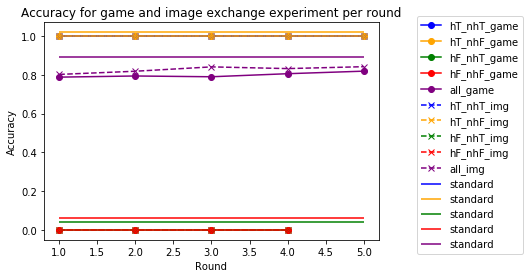

In [43]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
x_range = list(range(1,6))
plot_conds = ['hT_nhT', 'hT_nhF','hF_nhT','hF_nhF', 'all']
# plot_conds = ['all']

# Create the hist_means dictionary
hist_means = {condition:[] for condition in accs_hist}
nohist_means = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'games_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        nohist_means[condition].append(accs_nohist[condition].mean())
    
# Plot the game lines
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='o', label=condition+"_game", color=colors[i])

plt.title("Accuracy for game exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
# plt.show()


# Create dicts with the mean accuracies
hist_means = {condition:[] for condition in accs_hist}
nohist_means = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'imgs_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        nohist_means[condition].append(accs_nohist[condition].mean())
    
# Plot the images mean accuracies
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='x', label=condition+'_img', color=colors[i], linestyle='--')

# Plot the standard results (i.e. 0 or 1)
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.hlines(accs_hist_orig[condition]+(i*.02), 1, 5, color=colors[i], label='standard')

# Plot the random baseline
# plt.hlines(1/6, 1, 5, color='black', label='random')
# plt.hlines(1/12, 1, 5, color='black')
    
plt.title("Accuracy for game and image exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()   
    

Plot the results including the errorbar

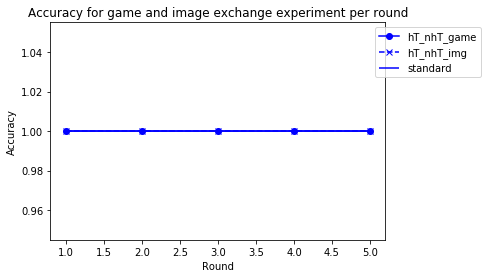

In [45]:
hist_means = {condition:[] for condition in accs_hist}
hist_stds = {condition:[] for condition in accs_hist}

nohist_means = {condition:[] for condition in accs_hist}
colors = ['blue', 'orange', 'green', 'red', 'purple']
x_range = list(range(1,6))
plot_conds = ['hT_nhT', 'hT_nhF','hF_nhT','hF_nhF', 'all']
plot_conds = ['all']
plot_conds = ['h_nh_all']
plot_conds = ['hT_nhT']
# plot_conds = ['hT_nhF']
# plot_conds = ['hT_nhF', 'hT_nhT']

# Create the hist_means dictionary
for i in range(5):
    experiment = 'games_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        hist_stds[condition].append(accs_hist[condition].std())
    
# Plot the game lines
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='o', label=condition+"_game", color=colors[i])
    plt.fill_between(x_range, np.array(hist_means[condition])-np.array(hist_stds[condition]), np.array(hist_means[condition])+np.array(hist_stds[condition]),
                     color=colors[i], alpha=.2)

plt.title("Accuracy for game exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
# plt.show()


# Create dicts with the mean accuracies
hist_means = {condition:[] for condition in accs_hist}
hist_stds = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'imgs_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        hist_stds[condition].append(accs_hist[condition].std())
    
# Plot the images mean accuracies
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='x', label=condition+'_img', color=colors[i], linestyle='--')
    plt.fill_between(x_range, np.array(hist_means[condition])-np.array(hist_stds[condition]), np.array(hist_means[condition])+np.array(hist_stds[condition]),
                    color=colors[i], alpha=.2)

# Plot the standard results (i.e. 0 or 1)
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.hlines(accs_hist_orig[condition]+(i*.02), 1, 5, color=colors[i], label='standard')

# Plot the random baseline
# plt.hlines(1/6, 1, 5, color='black', label='random')
# plt.hlines(1/12, 1, 5, color='black')
    
plt.title("Accuracy for game and image exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()   
    

## TODO: run a paired anova over the results per experiment, using results from the dataframe